# Evaluation of Tweets about Covid-19 with Sentiment Analysis and Deep Learning Models Using NLP

# Content
1. [Including Libraries](#1)
2. [Including the Dataset](#2)
3. [Data Analyze](#3)
4. [Distributing Classes](#4)
    * [Distributing Train Datas](#5)
    * [Distributing Test Datas](#6)
5. [Data Processing](#7)
    * [Data Cleaning](#8)
    * [Tokenization](#9)
6. [Training Process](#10)
    * [Artificial Neural Network](#11)
    * [Convolutional Neural Network](#12)
    * [Recurrent Neural Network](#13)
    * [Long Short Term Memory](#14)
7. [Beginning Train Process](#15)
8. [Drawing Charts](#16)
    * [Accuracy Charts](#17)
    * [Loss Charts](#18)
9. [Cleaning Test Datas](#19)
10. [Testing Models and Test Results](#20)
    * [Confusion Matrix](#21)

<a id="1"></a>
# Including Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


<a id="2"></a>
# Including the Dataset

In [2]:
train_df=pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv",encoding="latin1")
test_df=pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv",encoding="latin1")

<a id="3"></a>
# Data Analyze

In [3]:
train_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


* Here we see the attributes in the dataset and the first 10 data belonging to them.

In [4]:
print(f'Number of samples in the training dataset: {len(train_df)}')
print(f'Number of samples in the test dataset: {len(test_df)}')

Number of samples in the training dataset: 41157
Number of samples in the test dataset: 3798


* While there are 41157 pieces of data in total in the Training dataset, there are 3798 pieces of data in total in the Test dataset.

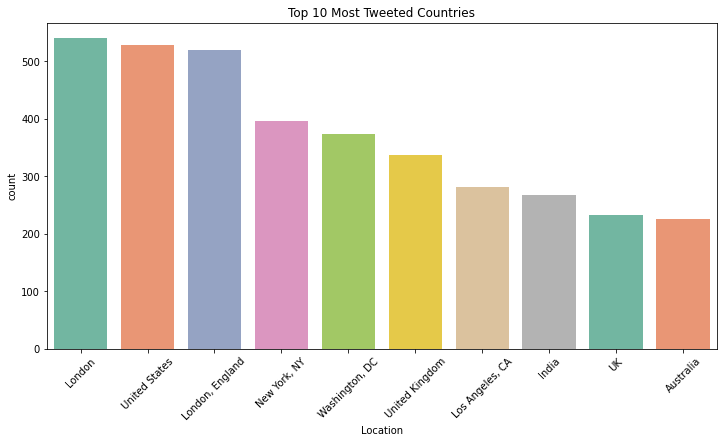

In [5]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Most Tweeted Countries')
countries=sns.countplot(x='Location',data=train_df,order=train_df['Location'].value_counts().index[:10],palette='Set2')
countries.set_xticklabels(countries.get_xticklabels(),rotation=45)
plt.show()

* Chart showing from which country the tweets in the dataset were posted.
* Only the top 10 most tweeted countries are shown here.

In [6]:
train_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

* We learn the number of empty data in the dataset.
* Here we see that there are 8590 empty data in the '*Location*' attribute. However, since this attribute will not be used in the process, we do not need to fill in or remove the empty data.

In [7]:
dist_train=train_df['Sentiment'].value_counts()
dist_test=test_df['Sentiment'].value_counts()
# We get the distribution of the "Sentiment" attribute, called the class tag, in the training and test dataset.
def distribution_plot(x,y,name,color):
    fig=go.Figure([go.Bar(x=x,y=y,marker={'color':color})])
    fig.update_layout(title_text=name)
    fig.show()

In [8]:
distribution_plot(x=dist_train.index,y=dist_train.values,name='Training Dataset Distribution of Data',color='#DC3912')

* Graph showing the number of classes in the emotionality attribute in the training dataset
* In total in the dataset:
     * 11422 pcs Positive
     * 9917 pieces of Negative
     * 7713 pcs Natural
     * 6624 Extremely Positive
     * 5481 pcs Extremely Negative
* tweets are included.

In [9]:
distribution_plot(x=dist_test.index,y=dist_test.values,name='Test Dataset Distribution of Data',color='#0099C6')

* Graph showing the number of classes in the emotionality attribute in the training dataset
* In total in the dataset:
     * 11422pcs Positive
     * 9917 pieces of negative
     * 7713 pcs Natural
     * 6624 Extremely Positive
     * 5481 pcs Extremely Negative
* tweets are included.

In [10]:
print(train_df['Sentiment'].unique())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


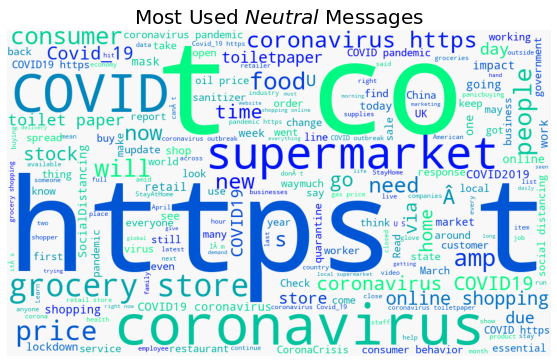

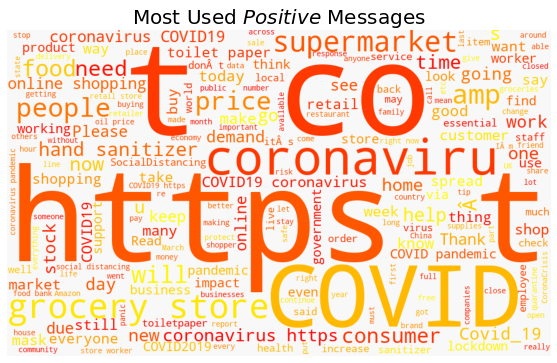

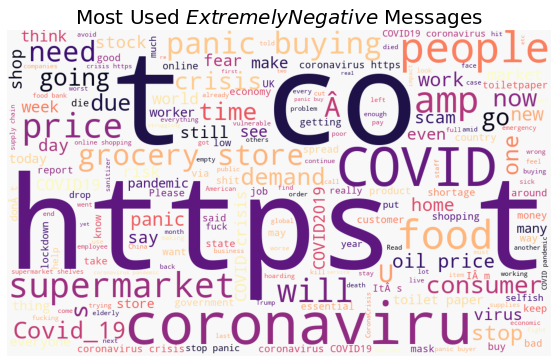

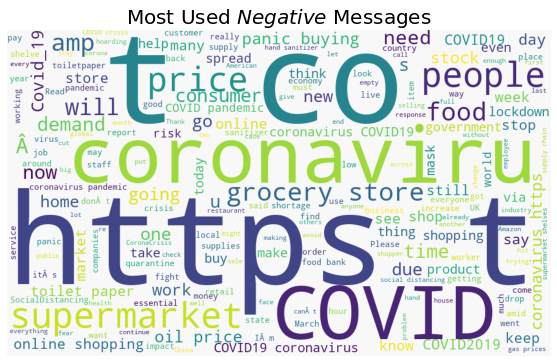

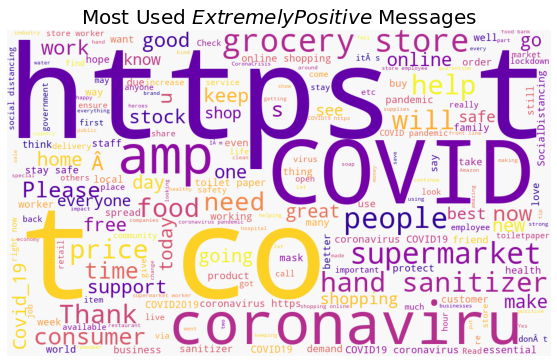

In [11]:
sentiments=train_df['Sentiment'].unique()
color_maps=['winter','autumn','magma','viridis','plasma']
for label,cmap in zip(sentiments,color_maps):
    text=train_df.query('Sentiment==@label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10,6))
    wc=WordCloud(width=1000,height=600,background_color='#f8f8f8',colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f'Most Used ${label}$ Messages',size=20)
    plt.show()

* Graphs of the most used words in tweets in the dataset by class tags.
* Because there are too many links in tweets, the word "https" has come to the fore in general.

<a id="4"></a>
# Distributing Classes

<a id="5"></a>
## Distributing Training Datas

In [12]:
X=train_df['OriginalTweet'].copy()
y=train_df['Sentiment'].copy()

In [13]:
X.head(10)

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

* Since the data we will train in the neural network will only consist of tweets and class tags, we do not take anything other than the "OriginalTweet" and "Sentiment" attributes as training or test data.

In [14]:
datas=[0.814112663269043,0.838072657585144,0.8412322402000427,0.8528172969818115]


<a id="6"></a>
## Distributing Test Datas

In [15]:
X_test=test_df['OriginalTweet'].copy()
y_test=test_df['Sentiment'].copy()

In [16]:
X_test.head(10)

0    TRENDING: New Yorkers encounter empty supermar...
1    When I couldn't find hand sanitizer at Fred Me...
2    Find out how you can protect yourself and love...
3    #Panic buying hits #NewYork City as anxious sh...
4    #toiletpaper #dunnypaper #coronavirus #coronav...
5    Do you remember the last time you paid $2.99 a...
6    Voting in the age of #coronavirus = hand sanit...
7    @DrTedros "We canÂt stop #COVID19 without pro...
8    HI TWITTER! I am a pharmacist. I sell hand san...
9    Anyone been in a supermarket over the last few...
Name: OriginalTweet, dtype: object

<a id="7"></a>
# Data Processing

<center><img src="https://i.ibb.co/4t376qX/nlp-nedir.jpg" /></center>

<h2> What is Natural Language Processing?</h2>
    
It is natural language processing that “computers can understand, process, interpret and even produce sentences in the language we speak”. Natural language processing is a discipline in which computational sciences (especially artificial intelligence and machine learning) and linguistics are used together. Technologies such as the chatbot we are talking about on the bank site today, the commands we give to the assistant on our phone, the translations we make in google/microsoft translate, and the prediction of the next word by our phone while writing a message are the result of natural language processing. In addition, text mining, which has been very popular recently, is also included in natural language processing. Thanks to text mining, we are able to process and make sense of the thoughts that accumulate in piles on the internet.

Since there are too many unnecessary and irregular expressions that will affect the accuracy of the training in the tweet data we will use, we first need to remove the unnecessary expressions in the tweets.
We can count the following as redundant expressions:
    
    * Because there are too many links in the tweet data, the "http" statement at the beginning of the links
    * Some punctuation marks
    * HTML tags 
    * Mathematical operators such as * +-/*
    * The "#" character named as "hashtag" in tweets
    * The "@" character used to denote people on Twitter
    * Finally, we remove letters that are not in the Latin alphabet from the tweet dataset. We replace these characters with the space character.
    
<center><img src="https://i.ibb.co/RjGXL42/1-ZVl-IZ1-ZYC6r-ASz-d-YPzh-ZQ-640x640.jpg" /></center>

After removing the unnecessary expressions, we need to break the sentences into words. If we divide sentences into words according to the spaces between two words, in some special cases there may be false divisions.
Example: In English, are is written as are not when an auxiliary verb is negative. If we delete the spaces directly, are and not will be separate expressions. To prevent this, we use the "word_tokenizer" function in the "nltk" library.


Then there are some so-called "stopwords" which will not affect the training results but rather waste time. We need to remove these words from the sentence. For this, we use the "words" method from the "stopwords" class in the "nltk" library. Thus and, the, but etc. We are removing the words from the sentence.

<center><img src="https://i.ibb.co/d7xx7XB/stop-words.jpg" /></center>

After this process, we find the root of the word "lemmatization". When some words are suffixed, the computer may perceive it as a word used in a different sense.
Example: When we do not lemmatize the word "caring" in English, it will perceive "ing" as an additional and divide the word into two as car and ing. This is something we do not want. In fact, the root of the word is “care”, when the lemmatization process is done, it will interpret the “ing” suffix found at the end of the word “caring” by looking at the root of the sentence and process this word as “care”. Basically, lemmatization studies are based not only on the dictionary meanings of words, but also on word structure and grammatical relations.

<center><img src="https://i.ibb.co/BZ3FK18/E2sx-Cv-YXIAMVm-Fn.jpg" /></center>

Finally, we put the words we cleared into sentences again.

<a id="8"></a>
## Cleaning

In [17]:
lemma=nlp.WordNetLemmatizer()
def data_cleaner(tweet):
    tweet=re.sub(r'http\S+', ' ',tweet)
    
    tweet=re.sub('\[.*?\]',' ',tweet)
    
    tweet=re.sub(r'<.*?>',' ',tweet)
    
    tweet=re.sub(r'\d+',' ', tweet)
    
    tweet=re.sub(r'#\w+',' ',tweet)
    
    tweet=re.sub(r'@\w+', ' ',tweet)
    
    tweet=re.sub('[^a-zA-Z]', ' ', tweet)
    
    tweet=tweet.lower()
    tweet=nltk.word_tokenize(tweet,'english')
    tweet=[word for word in tweet if not word in set(stopwords.words('english'))]
    tweet=[lemma.lemmatize(word) for word in tweet]
    tweet=' '.join(tweet)
    return tweet

In [18]:
X_cleaned=X.apply(data_cleaner)
X_cleaned.head(10)

0                                                     
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock one empty please panic enough food ...
4    ready go supermarket outbreak paranoid food st...
5    news region first confirmed covid case came su...
6    cashier grocery store sharing insight prove cr...
7                   supermarket today buy toilet paper
8    due covid retail store classroom atlanta open ...
9    corona prevention stop buy thing cash use onli...
Name: OriginalTweet, dtype: object

In [19]:
data_frame=pd.DataFrame({
    'Tweets':X_cleaned,
    'Sentiment':y
})

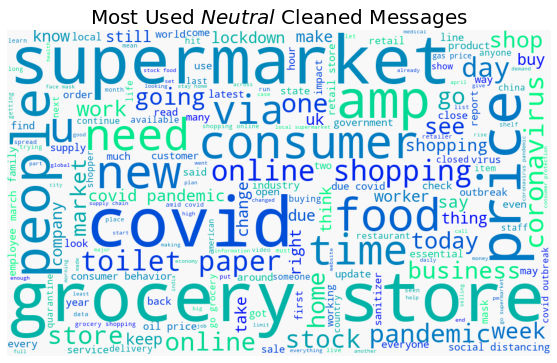

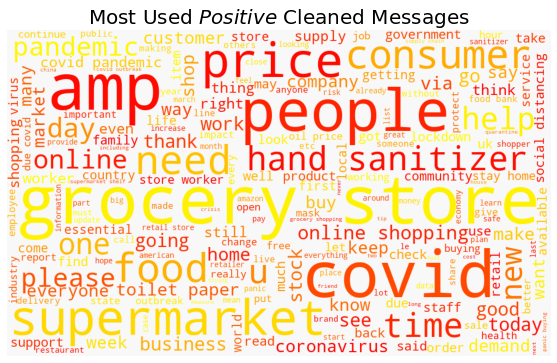

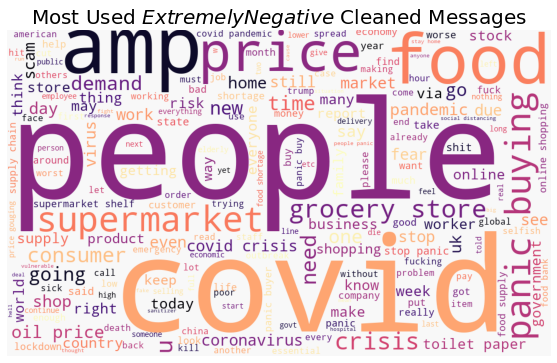

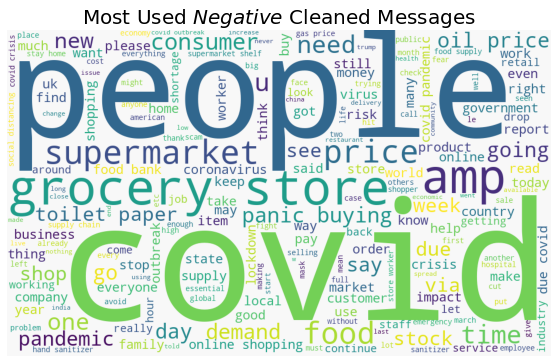

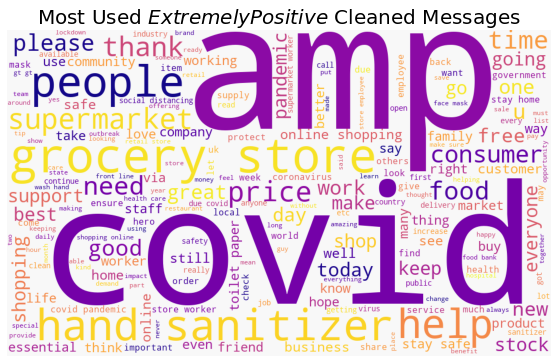

In [20]:
sentiments=data_frame['Sentiment'].unique()
color_maps=['winter','autumn','magma','viridis','plasma']
for label,cmap in zip(sentiments,color_maps):
    text=data_frame.query('Sentiment==@label')['Tweets'].str.cat(sep=' ')
    plt.figure(figsize=(10,6))
    wc=WordCloud(width=1000,height=600,background_color='#f8f8f8',colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.imsave(f'{label}.png',wc)
    plt.axis('off')
    plt.title(f'Most Used ${label}$ Cleaned Messages',size=20)
    plt.show()

* We apply the "data_cleaner" function that we wrote above to the variable X, that is, the variable with the tweets, and we clean the content of the tweets.
* When we compare the tweets we see at the top with the tweets we see here, we understand that there is a big difference.

<a id="9"></a>
## Tokenization

* We can shorten the training process or enable the artificial neural network model to learn better by combining similar or identical words and expressing them with a numeric character before training the tweets we clean with the artificial neural network.

In [21]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
X=tokenizer.texts_to_sequences(X_cleaned)
vocab_size=len(tokenizer.word_index)+1
print(f'Word Size : {vocab_size}')
print('\nSample:\n')
print(f'Original Sentence :\n{X_cleaned[10]}')
print(f'\nAfter Tokenization :\n{X[10]}')
X=pad_sequences(X,padding='post')
print(f'\nAfter Padding :\n{X[10]}')

Word Size : 28932

Sample:

Original Sentence :
month crowding supermarket restaurant however reducing hour closing mall mean everyone using entrance dependent single supermarket

After Tokenization :
[139, 3341, 4, 187, 719, 1429, 108, 477, 943, 210, 71, 236, 2036, 4096, 648, 4]

After Padding :
[ 139 3341    4  187  719 1429  108  477  943  210   71  236 2036 4096
  648    4    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


* As we can see here, the original sentence is "month crowding supermarket restaurant however reducing hour closing mall mean everyone using entrance dependent single supermarket", but after the tokenization process, we see it expressed in numerical characters as above.
* Padding is applied to make the data suitable for the neural network.

In [22]:
encoding={
    'Extremely Negative':0,
    'Negative':0,
    'Neutral':1,
    'Positive':2,
    'Extremely Positive':2
}
labels=['Negative','Neutral','Positive']
y.replace(encoding,inplace=True)

* Here we convert the class labels in the dataset into numeric expressions. While doing this, we reduce the class labels from 5 to 3.
* We get 3 class labels as Positive, Neural and Negative. In this way, the artificial neural network will make a decision much easier.

<a id="10"></a>
# Training Process

In [23]:
EPOCH=2
BATCH_SIZE=32
VALIDATION_SPLIT=0.12
EMBEDDING_DIMS=16

<a id="11"></a>
## Artificial Neural Network(ANN)

In [24]:
modelANN=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.Dense(512,activation='relu'),
    L.Dense(512,activation='relu'),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelANN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 45, 16)            462912    
_________________________________________________________________
dense (Dense)                (None, 45, 512)           8704      
_________________________________________________________________
dense_1 (Dense)              (None, 45, 512)           262656    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

2022-06-16 18:41:24.003012: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<a id="12"></a>
## Convolutional Neural Network(CNN)

In [25]:
modelCNN=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.Conv1D(512,activation='relu',kernel_size=5,padding='Same'),
    L.MaxPool1D(),
    L.Conv1D(512,activation='relu',kernel_size=3,padding='Same'),
    L.MaxPool1D(),
    L.Dropout(0.4),
    L.GlobalAveragePooling1D(),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelCNN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 16)            462912    
_________________________________________________________________
conv1d (Conv1D)              (None, 45, 512)           41472     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 22, 512)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 22, 512)           786944    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 512)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 512)           0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)              

<a id="13"></a>
## Recurrent Neural Network(RNN)

In [26]:
modelRNN=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.SimpleRNN(512,return_sequences=True,activation='relu'),
    L.SimpleRNN(512,return_sequences=True,activation='relu'),
    L.GlobalAveragePooling1D(),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelRNN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelRNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 45, 16)            462912    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 45, 512)           270848    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 45, 512)           524800    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

<a id="14"></a>
## Long Short Term Memory(LSTM)

In [27]:
modelLSTM=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(256,return_sequences=True)),
    L.Bidirectional(L.LSTM(256,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelLSTM.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 45, 16)            462912    
_________________________________________________________________
bidirectional (Bidirectional (None, 45, 512)           559104    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 45, 512)           1574912   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

<a id="15"></a>
# Beginning Train Process

In [28]:
print('Artificial Neural Network Model\n')
historyANN=modelANN.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)
print('Convolutional Neural Network Model\n')
historyCNN=modelCNN.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)
print('Recurrent Neural Network Model\n')
historyRNN=modelRNN.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)
print('Long Short Term Memory Model\n')
historyLSTM = modelLSTM.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Artificial Neural Network Model

Epoch 1/2


2022-06-16 18:41:25.919621: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1132/1132 [==============================] - 40s 35ms/step - loss: 0.6610 - accuracy: 0.7317 - val_loss: 0.4730 - val_accuracy: 0.8249
Epoch 2/2
1132/1132 [==============================] - 39s 34ms/step - loss: 0.4281 - accuracy: 0.8519 - val_loss: 0.4622 - val_accuracy: 0.8344
Convolutional Neural Network Model

Epoch 1/2
1132/1132 [==============================] - 70s 61ms/step - loss: 0.6429 - accuracy: 0.7325 - val_loss: 0.4031 - val_accuracy: 0.8611
Epoch 2/2
1132/1132 [==============================] - 69s 61ms/step - loss: 0.3598 - accuracy: 0.8864 - val_loss: 0.3896 - val_accuracy: 0.8658
Recurrent Neural Network Model

Epoch 1/2
1132/1132 [==============================] - 182s 159ms/step - loss: 0.8342 - accuracy: 0.6175 - val_loss: 0.5653 - val_accuracy: 0.7975
Epoch 2/2
1132/1132 [==============================] - 178s 157ms/step - loss: 0.4483 - accuracy: 0.8521 - val_loss: 0.4215 - val_accuracy: 0.8469
Long Short Term Memory Model

Epoch 1/2
1132/1132 [=================

In [29]:
history={'ANN':historyANN, 'CNN':historyCNN, 'RNN':historyRNN, 'LSTM':historyLSTM}

In [30]:
model_names=['Artificial Neural Network', 'Convolutional Neural Network', 'Recurrent Neural Network', 'Long Short Term Memory' ]

<a id="16"></a>
# Drawing Charts

<a id="17"></a>
## Accuracy Charts

In [31]:
for i,hist in enumerate(history):
    fig=px.line(history[hist].history,y=['accuracy','val_accuracy'],
               labels={'index':'epoch','value':'accuracy'},
               title=f'According to the epoch {model_names[i]} accuracy and validation accuracy chart for the model')
    fig.show()

<a id="18"></a>
## Loss Charts

In [32]:
for i,hist in enumerate(history):
    fig=px.line(history[hist].history,y=['loss','val_loss'],
               labels={'index':'epoch','value':'loss'},
               title=f'According to the epoch {model_names[i]} loss and validation loss chart for the model')
    fig.show()

<a id="19"></a>
# Cleaning Test Datas

In [33]:
X_test=X_test.apply(data_cleaner)
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test,padding='post')
y_test.replace(encoding,inplace=True)

* Here we need to clean the test data just like we do the training data. Because test data also contains unnecessary characters like training data.
* For this, we apply the "data_cleaner" function we defined above to the test data and change the "y_test", that is, the class labels of the test data, to 0-1-2 as we do to the training data.

In [34]:
models={'ANN':modelANN, 'CNN':modelCNN, 'RNN':modelRNN, 'LSTM':modelLSTM}

In [35]:
models

{'ANN': <keras.engine.sequential.Sequential at 0x7fa880de4990>,
 'CNN': <keras.engine.sequential.Sequential at 0x7fa873fddf10>,
 'RNN': <keras.engine.sequential.Sequential at 0x7fa873fdd810>,
 'LSTM': <keras.engine.sequential.Sequential at 0x7fa88132dc50>}

In [36]:
classes={}
for i,model in enumerate(models):
    prediction=models[model].predict(X_test)
    classes[model]=np.argmax(prediction,axis=1)

In [37]:
classes

{'ANN': array([0, 2, 2, ..., 1, 0, 2]),
 'CNN': array([0, 2, 2, ..., 1, 0, 2]),
 'RNN': array([0, 2, 2, ..., 1, 0, 2]),
 'LSTM': array([0, 2, 2, ..., 1, 0, 2])}

<a id="20"></a>
# Testing Models and Test Results

In [38]:
for i,model in enumerate(models):
    print(model)
    loss,accuracy=models[model].evaluate(X_test,y_test,verbose=0)
    print(f'Test Loss: {loss}')
    print(f'Test Accuracy: {accuracy}')

ANN
Test Loss: 0.4946623742580414
Test Accuracy: 0.8146392703056335
CNN
Test Loss: 0.45230633020401
Test Accuracy: 0.8449183702468872
RNN
Test Loss: 0.4902232885360718
Test Accuracy: 0.8264876008033752
LSTM
Test Loss: 0.45975053310394287
Test Accuracy: 0.8488678336143494


<a id="21"></a>
## Confusion Matrix

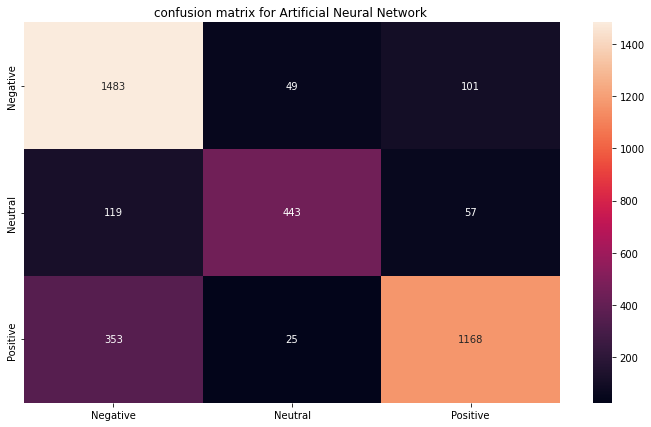

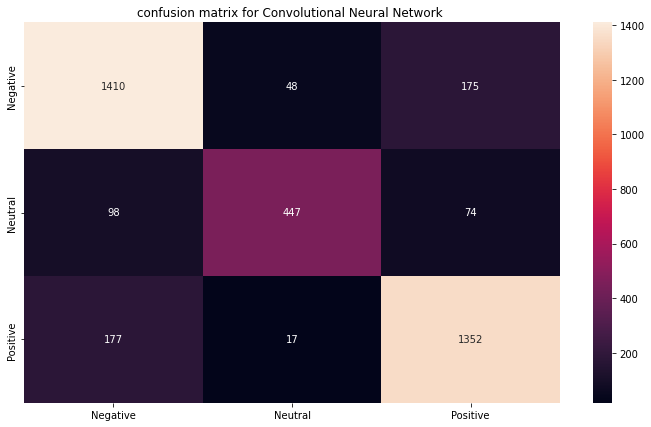

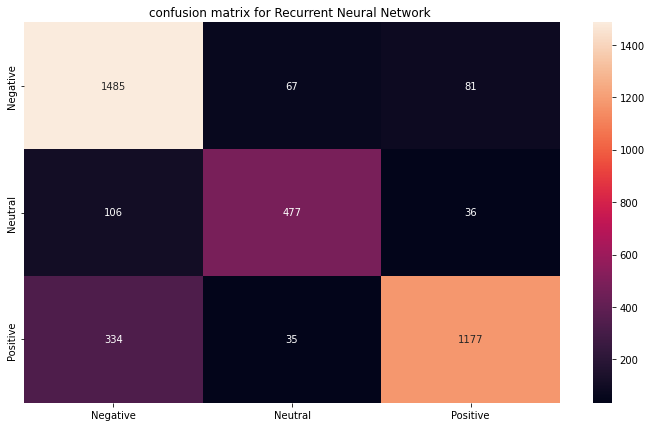

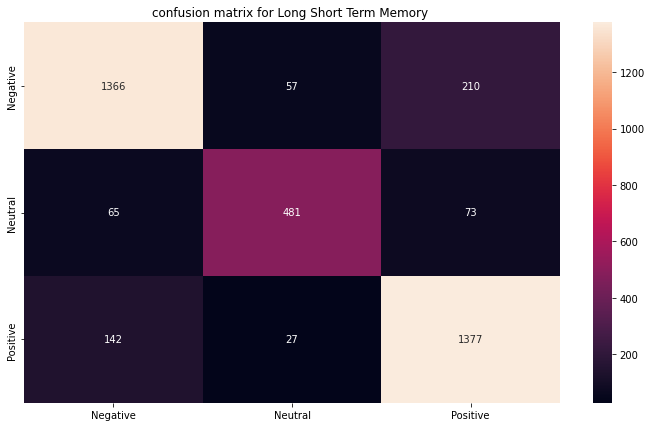

In [39]:
for i, c in enumerate(classes):
    conf=confusion_matrix(y_test,classes[c])
    cm=pd.DataFrame(
        conf,index=[i for i in labels],
        columns=[i for i in labels]
    )
    plt.figure(figsize=(12,7))
    ax=sns.heatmap(cm,annot=True,fmt='d')
    ax.set_title(f'confusion matrix for {model_names[i]} ')
    plt.show()

In [40]:
for i, c in enumerate(classes):
    print(f'{model_names[i]}\n',classification_report(y_test,classes[c],target_names=labels))

Artificial Neural Network
               precision    recall  f1-score   support

    Negative       0.76      0.91      0.83      1633
     Neutral       0.86      0.72      0.78       619
    Positive       0.88      0.76      0.81      1546

    accuracy                           0.81      3798
   macro avg       0.83      0.79      0.81      3798
weighted avg       0.82      0.81      0.81      3798

Convolutional Neural Network
               precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      1633
     Neutral       0.87      0.72      0.79       619
    Positive       0.84      0.87      0.86      1546

    accuracy                           0.84      3798
   macro avg       0.85      0.82      0.83      3798
weighted avg       0.85      0.84      0.84      3798

Recurrent Neural Network
               precision    recall  f1-score   support

    Negative       0.77      0.91      0.83      1633
     Neutral       0.82      0.77      0.80   